<a href="https://colab.research.google.com/github/smeshnayasova61/theory_of_probability/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9_%D0%B8_%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Прикрепить ссылку на курсовой проект на github. (см. выбор темы в ДЗ к Уроку 6)

Даны значения величины Среднего артериального давления (MBP)  и значения пульса (Ps):
MBP = [117, 119, 121,  93,  94, 108, 100, 122, 120, 106],
Ps = [104, 101,  83,  83,  78,  83, 102, 111,  85, 105]. 

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X MBP (то есть, MBP - признак), а за y - значения PS (то есть, Ps - целевая переменная). Произвести расчет с использованием intercept.

Известно, что  генеральная совокупность MBP и PS   распределена нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [ ]:
import numpy as np

In [ ]:
MBP=np.random.randint(90, 123, size=10, dtype='l')
np.random.seed(90)
MBP


array([120, 117,  99,  99,  94,  99, 118, 101, 121,  99])

In [ ]:
Ps=np.random.randint(74, 115, size=10, dtype='l')
np.random.seed(74)
Ps

array([101, 103, 105,  77, 113,  78, 111,  92,  84, 106])

In [ ]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.weightstats import _tconfint_generic as t_stat
from statsmodels.stats.weightstats import _zconfint_generic as z_stat

In [ ]:
MBP = np.array([117, 119, 121,  93,  94, 108, 100, 122, 120, 106])
Ps = np.array([104, 101,  83,  83,  78,  83, 102, 111,  85, 105])

In [ ]:
x_mean = MBP.mean()
x_mean

110.0

In [ ]:
y_mean = Ps.mean()
y_mean

93.5

In [ ]:
xy_mean = (MBP * Ps).mean()
xy_mean

10331.7

In [ ]:
from numpy.lib.function_base import cov
cov_Ps = xy_mean - x_mean * y_mean
cov_Ps

46.70000000000073

Найдем ковариацию двух велечин с помощью стандартной функции:

In [ ]:
np.cov(MBP, Ps, ddof=0)

array([[116.  ,  46.7 ],
       [ 46.7 , 132.05]])

In [ ]:
cov_Ps2 = ((MBP - MBP.mean()) * (Ps - Ps.mean())).mean()
cov_Ps2

46.7

Найдем коэффициент корреляции Пирсона с помощью кавариации и среднеквадратичных отклонений двух признаков.

In [ ]:
x_std = MBP.std()
x_std

10.770329614269007

In [ ]:
y_std = Ps.std()
y_std

11.49130105775669

In [ ]:
corr_Ps = cov_Ps / (x_std * y_std)
corr_Ps

0.37732769550123435

Найдем коэффициент корреляции Пирсона с помощью функции библиотеки numpy

In [ ]:
np.corrcoef(MBP, Ps)

array([[1.       , 0.3773277],
       [0.3773277, 1.       ]])

Ответ: ковариация двух велечин равна 46.7.
Коэффициент корреляции Пирсона двух велечин равен 0.37732769550123435 (между велечинами есть прямая слабая связь, т.е.чем выше MBP, тем выше PS)

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X MBP (то есть, MBP - признак), а за y - значения PS (то есть, Ps - целевая переменная). Произвести расчет с использованием intercept.

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()

In [ ]:
MBP = np.array([117, 119, 121,  93,  94, 108, 100, 122, 120, 106])
Ps = np.array([104, 101,  83,  83,  78,  83, 102, 111,  85, 105])

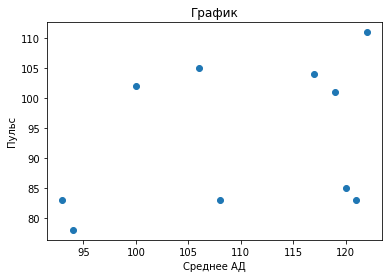

In [ ]:
plt.scatter(MBP, Ps)
plt.title('График')
plt.xlabel('Среднее АД')
plt.ylabel('Пульс')
plt.show()

In [ ]:
n = len(MBP)
n

10

In [ ]:
b1 = (n*np.sum(MBP*Ps) - np.sum(MBP)*np.sum(Ps)) / (n*np.sum(MBP**2) - np.sum(MBP)**2)
b1

0.4025862068965517

In [ ]:
b0 = np.mean(Ps) - b1 * np.mean(MBP)
b0

49.21551724137931

In [ ]:
r = (np.corrcoef(MBP, Ps) [1,0])**2
r

0.14237618979226782

In [ ]:
print(f'b0 = {b0}; b1 = {b1}; r = {r}')
# b0 или а - intercept
# b1  или b- slope
# r - coefficient of determination

b0 = 49.21551724137931; b1 = 0.4025862068965517; r = 0.14237618979226782


Проверим наши вычисления со встроенными функциями:

In [ ]:
MBP_reshaped = MBP.reshape(-1,1)
model.fit(MBP_reshaped, Ps)
r_sq = model.score(MBP_reshaped, Ps)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.1423761897922674
intercept: 49.2155172413793
slope: [0.40258621]


Наша модель будет выглядеть:
$$y = 49.22 + 0.40*x$$ \\
Визуализируем нашу модель:

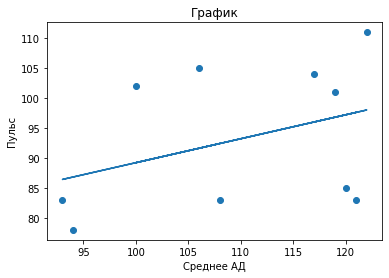

In [ ]:
plt.scatter(MBP, Ps)
plt.plot(MBP, 49.22 + 0.40 * MBP)
plt.title('График')
plt.xlabel('Среднее АД')
plt.ylabel('Пульс')
plt.show()

In [ ]:
import numpy as np

# количество наблюдений
n = 10

x = np.array([117, 119, 121,  93,  94, 108, 100, 122, 120, 106])
y = np.array([104, 101,  83,  83,  78,  83, 102, 111,  85, 105])

In [ ]:
#коэффициент линейной регрессии b
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

0.402586206896558

In [ ]:
#коэффициент линейной регрессии а
a = np.mean(y) - b * np.mean(x)
a

49.21551724137862

Получаем уравнение линейной регрессии:
$$y = 444.18 + 2.62*x$$

In [ ]:
#коэффициент корреляции
r = b * np.std(x) / np.std(y)
r

0.37732769550123435

коэффициент корреляции близок к 0, значит корреляционная связь слабая, положительный, значит существует прямая зависимость между MBP и PS.

In [ ]:
#коэффициент детерминации
R2 = r**2
R2

0.14237618979227223

Это означает, что 14.2% вариации Ps ($y$) объясняется вариацией фактора $x$ — MBP.

С помощью этого уравнения регрессии посчитаем значения, предсказанные моделью значения ks:

In [ ]:
y_pred = a + b * x
y_pred

array([96.31810345, 97.12327586, 97.92844828, 86.65603448, 87.05862069,
       92.69482759, 89.47413793, 98.33103448, 97.52586207, 91.88965517])

In [ ]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df

,x,y,y_pred
0,117,104,96.318103
1,119,101,97.123276
2,121,83,97.928448
3,93,83,86.656034
4,94,78,87.058621
5,108,83,92.694828
6,100,102,89.474138
7,122,111,98.331034
8,120,85,97.525862
9,106,105,91.889655


In [ ]:
df = df.sort_values('x')
df

,x,y,y_pred
3,93,83,86.656034
4,94,78,87.058621
6,100,102,89.474138
9,106,105,91.889655
5,108,83,92.694828
0,117,104,96.318103
1,119,101,97.123276
8,120,85,97.525862
2,121,83,97.928448
7,122,111,98.331034


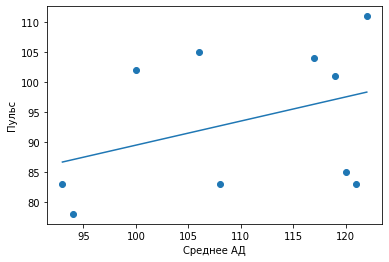

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Среднее АД')
plt.ylabel('Пульс')
plt.show()

MBP = [117, 119, 121,  93,  94, 108, 100, 122, 120, 106],
Ps = [104, 101,  83,  83,  78,  83, 102, 111,  85, 105]. 

Известно, что  генеральная совокупность MBP и PS   распределена нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [ ]:
x=np.array([117, 119, 121,  93,  94, 108, 100, 122, 120, 106])
x_mean = x.mean()
x_mean

110.0

In [ ]:
std_x = x.std(ddof=1)
std_x

11.352924243950934

In [ ]:
x_mean_std = std_x / (np.sqrt(len(x)))
x_mean_std

3.590109871423002

In [ ]:
t_stat(x_mean, x_mean_std, len(x) - 1, 0.05, 'two-sided')

(101.87860723933332, 118.12139276066668)

Вывод: [101.88, 118.12]  - этот интервал с вероятностью 95% покрывает истинное M(X) генеральной совокупности. 

In [ ]:
x=np.array([104, 101,  83,  83,  78,  83, 102, 111,  85, 105])
x_mean = x.mean()
x_mean

93.5

In [ ]:
std_x = x.std(ddof=1)
std_x

12.112894873737748

In [ ]:
x_mean_std = std_x / (np.sqrt(len(x)))
x_mean_std

3.830433685918896

In [ ]:
t_stat(x_mean, x_mean_std, len(x) - 1, 0.05, 'two-sided')

(84.8349570009942, 102.1650429990058)

Вывод: [84.84, 102.17]  - этот интервал с вероятностью 95% покрывает истинное M(X) генеральной совокупности.